In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

def eqns(x,t,m,q,E,B):
    '''
    Function: eqns
    author: David Urminsky
    description: equations of motion for a charged particle moving through a electric field 
                 in the y direction and a magnetic field perpedicular to the screen.
    '''
    dy1 = x[2]
    dy2 = x[3]
    dy3 = q*(x[3]*B)/m
    dy4 = q*(E-x[2]*B)/m
    return [dy1,dy2,dy3,dy4]

def motion(E=0,B=0.25e-6,q=1.6e-19,m=1.67e-27,vx=1.0e2,frac=2.0/3.0):
    """
    function: motion
    author:   David Urminsky
    description:  This function will advance  
                  charged particle through a magnetic
                  field and an electric field. It returns
                  a figure. 
    
    Here is a list of imput parameters:
    
    E    - magnitude of electric field 
           (points in y direction) (default E= 0)
    B    - magnitude of magnetic field
           (perpenduclar to page. negative value
             will change the direction) 
           (default B = .25e-6 T)
    q    - charge of the particle (default q = e)
    m    - mass of the particle (default m = mass of proton)
    vx   - initial velocity in the positive x direction
           (default vx= 100 m/s)
    frac - fraction of the period T to integrate the motion
           (default frac = 2/3)
    
    ax - plot returned as a figure.
    Example:
    motion(B=1.0e-5,)
    """
    
    vy=0.0 # set up the y coordinate for velocity
    ax = plt.figure()   # initialize figure
    y0 = [0.0,0.0,vx,vy] #inital conditions [x,y,vx,vy]
    args=(m,q,E,B)
    T = 2*np.pi*m/(np.abs(q)*np.abs(B))  # gets the period of the motion
    t = np.linspace(0,T*frac,25000)  # defines the times to output positions and velocities
    sol = odeint(eqns, y0, t,args)  # integrate the system of equations 
    _ = plt.plot(sol[:,0],sol[:,1]) # Create the hplot
    _ = plt.axis([-10,10,-10,10])   # set axis bounds
    _ = plt.title("|B| = " + str(np.abs(B))) # title for plot
    _ = plt.grid()
    
    # Below is just creating the magnetic field vectors for the figure
    xarrow=np.linspace(-10,10,10)
    yarrow=np.linspace(-10,10,10)
    for coord in xarrow:
        for ycoord in yarrow:
            #_ = plt.arrow(coord, 0.2, 0, 9, head_width=0.25, head_length=0.75, fc='b', ec='b')
            if B > 0.:
                _ = plt.plot(coord,ycoord,'x',color='b')
            else:
                _ = plt.plot(coord,ycoord,'.',color='b')
    _ = plt.annotate("B", xy=(2, 1), xytext=(8.5, 5),color='b',size=20)

    return ax #return the plot 

def motion_inter(Q,M,FRAC):
    Q = Q*1.6e-19
    M = M*1.67e-27
    motion(q=Q,m=M,frac=FRAC)
    plt.show()


# Motion of a charge in a Magnetic Field

Consider a charge, $q$, moving in a magnetic field, $\mathbf{B}$.  The charge experiences a force
$$
\mathbf{F} = q\;\left( \mathbf{v}\times\mathbf{B}\right).
$$



## Exercises
1) Does the magnetic field do any work?

2) Does the speed of the particle change due to this force?

3) is there an acceleration? If so, in what direction?



## Motion in a uniform field

For a uniform magnetic field pointing into the page, as shown below, indicate the direction of the force for a positive charge moving with the velocity shown. The sketch the velocity (direction and magnitude)
you would expect to see next, and the force for that velocity, again and again. What pattern forms?

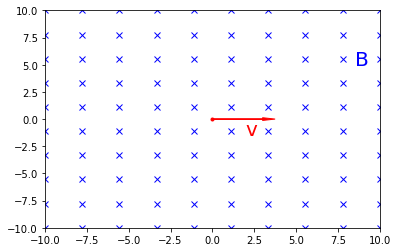

In [3]:
plt.axis([-10,10,-10,10])
xarrow=np.linspace(-10,10,10)
yarrow=np.linspace(-10,10,10)
for coord in xarrow:
    for ycoord in yarrow:
        #_ = plt.arrow(coord, 0.2, 0, 9, head_width=0.25, head_length=0.75, fc='b', ec='b')
         plt.plot(coord,ycoord,'x',color='b')
plt.annotate("B", xy=(2, 1), xytext=(8.5, 5),color='b',size=20)
plt.arrow(0.,0.,3.0,0, head_width=0.25, head_length=0.75, fc='r', ec='r')
plt.annotate("v", xy=(2, -1), xytext=(2, -1.5),color='r',size=20)
plt.plot(0,0,'.',color='r')
plt.show()


## Now you Try

For the example below, you can vary the charge of the particle on the interval $-10e<q<10e$ and the mass from $0.1 m_p<m<5*m_p$.  See what happens to the direction of rotation as the sign of the charge changes.  Also how the radious of curvature changes for different charge and mass values.

In [4]:
#i = interact(motion_inter,widgets.FloatSlider(min=-10.,max=10.,step=.13,value=4.,description='here'),M=(.1,5,.1),FRAC=(0.0,1,.1))
i = interact(motion_inter,Q=widgets.FloatSlider(min=-10.,max=10.,step=.13,value=4.,description='Charge multiple of e (N*e)'),M=widgets.FloatSlider(min=.1,max=5,step=.1,value=1,description='Mass:'),FRAC=widgets.FloatSlider(min=0.1,max=1,step=.1,description='Fraction of T:'))

## Excercise

4) Find the radius of curvature of the path the a charged particle will take while moving through the above magnetic field.


## Now you try

The function motion will advance the particle within the above magnetic field.  



In [5]:
help(motion)

Help on function motion in module __main__:

motion(E=0, B=2.5e-07, q=1.6e-19, m=1.67e-27, vx=100.0, frac=0.6666666666666666)
    function: motion
    author:   David Urminsky
    description:  This function will advance  
                  charged particle through a magnetic
                  field and an electric field. It returns
                  a figure. 
    
    Here is a list of imput parameters:
    
    E    - magnitude of electric field 
           (points in y direction) (default E= 0)
    B    - magnitude of magnetic field
           (perpenduclar to page. negative value
             will change the direction) 
           (default B = .25e-6 T)
    q    - charge of the particle (default q = e)
    m    - mass of the particle (default m = mass of proton)
    vx   - initial velocity in the positive x direction
           (default vx= 100 m/s)
    frac - fraction of the period T to integrate the motion
           (default frac = 2/3)
    
    ax - plot returned as a figure.


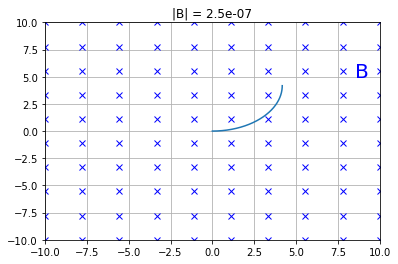

In [6]:
'''
The following commands will have an electron move through a 
magnetic field of magnitude B = 0.25e-6 T from t = 0 to 
t = T/4
'''
f = motion(B=.25e-6,q=-1.6e-19,frac=0.25)
plt.show()

## Exercises

5) Advance an alpha particle  (2 protons, 2 neutrons) through a magnetic field of magnitude 0.25e-6 T, with an initial speed in the x direction of, vx=30 m/s. What is the radius of curvature Check the result with the theoretical value obtained above in exercise 4.

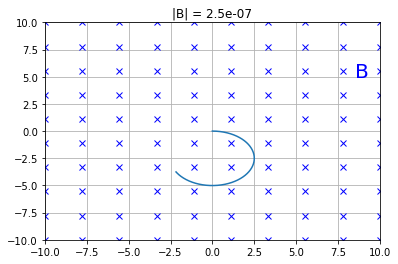

In [9]:
f = motion(B= .25e-6, q =3.2e-19 , m=4*1.67e-27 , vx =30.0 )
plt.show()

6) for the previous problem, add an electric field of magnitude E = 2.0e-7 N/C and describe the motion over 5 periods.

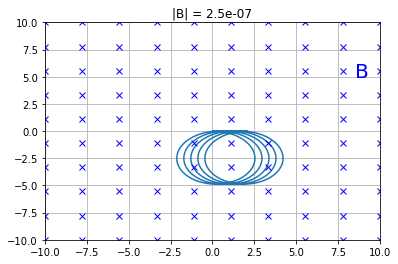

In [11]:
f = motion(E = 2.0e-7,B= .25e-6, q =3.2e-19 , m=4*1.67e-27 , vx =30.0, frac=5 )
plt.show()